In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.set_random_seed(777)

In [2]:
xy = np.loadtxt('Energy Efficiency_data.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-2]
y_data = xy[:, 8:]
print(x_data.shape, y_data.shape)

(768, 8) (768, 2)


In [3]:
nb_classes = 4

In [4]:
train_size = int(len(y_data) * 0.8)
test_size = len(y_data) - train_size
x_train = x_data[0:train_size]
x_test = x_data[train_size:len(x_data)]
y_train = y_data[0:train_size]
y_test = y_data[train_size:len(y_data)]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 8) (614, 2)
(154, 8) (154, 2)


In [5]:
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.int32, shape=[None, 1])
Y_one_hot = tf.one_hot(Y, nb_classes)
print(Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print(Y_one_hot)

Tensor("one_hot:0", shape=(?, 1, 4), dtype=float32)
Tensor("Reshape:0", shape=(?, 4), dtype=float32)


In [6]:
W1 = tf.get_variable("weight1", shape=[8, 50], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([50]), name='bias1')
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

In [7]:
W2 = tf.get_variable("weight2", shape=[50, 20], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([20]), name='bias2')
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

In [8]:
W3 = tf.get_variable("weight3", shape=[20, 30], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([30]), name='bias3')
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

In [9]:
W4 = tf.get_variable("weight4", shape=[30, 70], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([70]), name='bias4')
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

In [10]:
W5 = tf.get_variable("weight5", shape=[70, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([nb_classes]), name='bias5')

In [11]:
logits = tf.matmul(L4, W5) + b5
hypothesis = tf.nn.softmax(logits)

In [12]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [14]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

< Train Y1 : Heating Load >
Step:     0	Cost: 60.900	Acc: 28.34%
Step:   100	Cost: 0.752	Acc: 61.89%
Step:   200	Cost: 0.710	Acc: 61.89%
Step:   300	Cost: 0.685	Acc: 62.21%
Step:   400	Cost: 0.650	Acc: 66.78%
Step:   500	Cost: 0.609	Acc: 76.22%
Step:   600	Cost: 0.570	Acc: 79.15%
Step:   700	Cost: 0.540	Acc: 79.80%
Step:   800	Cost: 0.515	Acc: 80.62%
Step:   900	Cost: 0.496	Acc: 78.99%
Step:  1000	Cost: 0.486	Acc: 78.34%
Step:  1100	Cost: 0.466	Acc: 80.78%
Step:  1200	Cost: 0.449	Acc: 80.94%
Step:  1300	Cost: 0.434	Acc: 80.46%
Step:  1400	Cost: 0.419	Acc: 80.94%
Step:  1500	Cost: 0.405	Acc: 83.55%
Step:  1600	Cost: 0.391	Acc: 81.27%
Step:  1700	Cost: 0.383	Acc: 80.62%
Step:  1800	Cost: 0.355	Acc: 84.69%
Step:  1900	Cost: 0.351	Acc: 82.41%
Step:  2000	Cost: 0.343	Acc: 81.43%

--------------------------------------------------

< Test Y1 : Heating Load >
[False]	Prediction: 0 True Y1: 1
[False]	Prediction: 0 True Y1: 1
[True]	Prediction: 1 True Y1: 1
[True]	Prediction: 1 True Y1: 1
[True

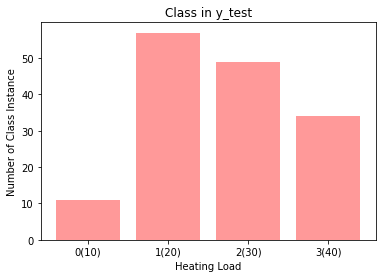

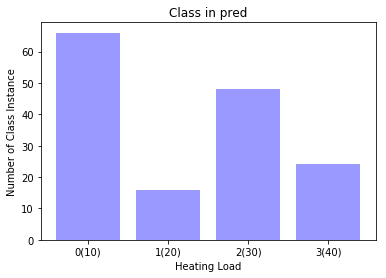

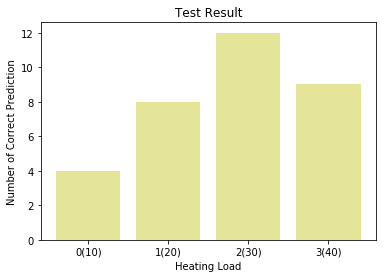

In [15]:
print("< Train Y1 : Heating Load >")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_train, Y: y_train[:, [0]]})        
        
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_train, Y: y_train[:, [0]]})
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

    # Let's see if we can predict
    print("\n--------------------------------------------------\n\n< Test Y1 : Heating Load >")
    pred = sess.run(prediction, feed_dict={X: x_test})
    
    cnt = [0, 0, 0, 0]
    cnt1 = [0, 0, 0, 0]  # y_test
    cnt2 = [0, 0, 0, 0]  # pred
    for p, y in zip(pred, y_test.flatten()):
        print("[{}]\tPrediction: {} True Y1: {}".format(p == int(y), p, int(y)))
        if(p == int(y) and p == 0):
            cnt[0]+=1;
        elif(p == int(y) and p == 1):
            cnt[1]+=1;
        elif(p == int(y) and p == 2):
            cnt[2]+=1;
        elif(p == int(y) and p == 3):
            cnt[3]+=1;
            
        if(int(y) == 0):
            cnt1[0]+=1;
        elif(int(y) == 1):
            cnt1[1]+=1;
        elif(int(y) == 2):
            cnt1[2]+=1;
        elif(int(y) == 3):
            cnt1[3]+=1;
            
        if(p == 0):
            cnt2[0]+=1;
        elif(p == 1):
            cnt2[1]+=1;
        elif(p == 2):
            cnt2[2]+=1;
        elif(p == 3):
            cnt2[3]+=1; 
    
    y = cnt1
    x = np.arange(len(y))
    xlabel = [u'0(10)', u'1(20)', u'2(30)', u'3(40)']
    plt.bar(x, y, color='r', alpha=0.4)
    plt.xticks(x, xlabel)
    plt.title('Class in y_test')
    plt.xlabel('Heating Load')
    plt.ylabel('Number of Class Instance')
    plt.show()
    
    y = cnt2
    x = np.arange(len(y))
    xlabel = [u'0(10)', u'1(20)', u'2(30)', u'3(40)']
    plt.bar(x, y, color='b', alpha=0.4)
    plt.xticks(x, xlabel)
    plt.title('Class in pred')
    plt.xlabel('Heating Load')
    plt.ylabel('Number of Class Instance')
    plt.show()
    
    y = cnt
    x = np.arange(len(y))
    xlabel = [u'0(10)', u'1(20)', u'2(30)', u'3(40)']
    plt.bar(x, y, color='y', alpha=0.4)
    plt.xticks(x, xlabel)
    plt.title('Test Result')
    plt.xlabel('Heating Load')
    plt.ylabel('Number of Correct Prediction')
    plt.show()

In [16]:
nb_classes = 5

In [17]:
Y_one_hot = tf.one_hot(Y, nb_classes)
print(Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print(Y_one_hot)

Tensor("one_hot_1:0", shape=(?, 1, 5), dtype=float32)
Tensor("Reshape_4:0", shape=(?, 5), dtype=float32)


In [18]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

< Train Y2 : Cooling Load >
Step:     0	Cost: 65.116	Acc: 33.39%
Step:   100	Cost: 6.919	Acc: 16.29%
Step:   200	Cost: 0.767	Acc: 64.98%
Step:   300	Cost: 0.711	Acc: 64.98%
Step:   400	Cost: 0.689	Acc: 65.64%
Step:   500	Cost: 0.678	Acc: 66.45%
Step:   600	Cost: 0.666	Acc: 66.61%
Step:   700	Cost: 0.660	Acc: 67.10%
Step:   800	Cost: 0.655	Acc: 67.75%
Step:   900	Cost: 0.645	Acc: 66.78%
Step:  1000	Cost: 0.640	Acc: 66.61%
Step:  1100	Cost: 0.635	Acc: 66.61%
Step:  1200	Cost: 0.631	Acc: 66.61%
Step:  1300	Cost: 0.627	Acc: 67.75%
Step:  1400	Cost: 0.623	Acc: 68.08%
Step:  1500	Cost: 0.615	Acc: 67.10%
Step:  1600	Cost: 0.611	Acc: 66.61%
Step:  1700	Cost: 0.600	Acc: 69.54%
Step:  1800	Cost: 0.596	Acc: 70.03%
Step:  1900	Cost: 0.592	Acc: 72.64%
Step:  2000	Cost: 0.589	Acc: 72.15%

--------------------------------------------------

< Test Y2 : Cooling Load >
[True]	Prediction: 1 True Y2: 1
[True]	Prediction: 1 True Y2: 1
[True]	Prediction: 1 True Y2: 1
[True]	Prediction: 1 True Y2: 1
[True]	

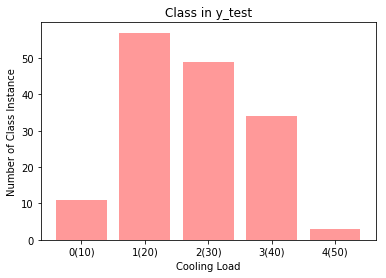

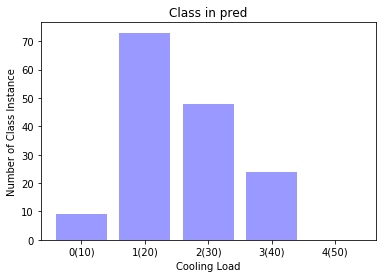

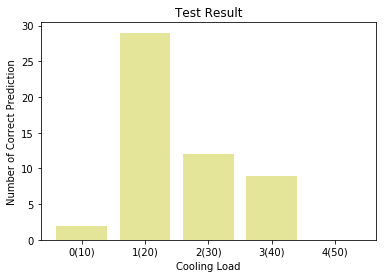

In [19]:
print("< Train Y2 : Cooling Load >")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):   
        sess.run(optimizer, feed_dict={X: x_train, Y: y_train[:, [-1]]})
        
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_train, Y: y_train[:, [-1]]})
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

    # Let's see if we can predict
    print("\n--------------------------------------------------\n\n< Test Y2 : Cooling Load >")
    pred = sess.run(prediction, feed_dict={X: x_test})
    
    cnt = [0, 0, 0, 0, 0]
    cnt1 = [0, 0, 0, 0, 0]  # y_test
    cnt2 = [0, 0, 0, 0, 0]  # pred
    for p, y in zip(pred, y_test.flatten()):
        print("[{}]\tPrediction: {} True Y2: {}".format(p == int(y), p, int(y)))
        if(p == int(y) and p == 0):
            cnt[0]+=1;
        elif(p == int(y) and p == 1):
            cnt[1]+=1;
        elif(p == int(y) and p == 2):
            cnt[2]+=1;
        elif(p == int(y) and p == 3):
            cnt[3]+=1;
        elif(p == int(y) and p == 4):
            cnt[4]+=1;
            
        if(int(y) == 0):
            cnt1[0]+=1;
        elif(int(y) == 1):
            cnt1[1]+=1;
        elif(int(y) == 2):
            cnt1[2]+=1;
        elif(int(y) == 3):
            cnt1[3]+=1;
        elif(int(y) == 4):
            cnt1[4]+=1;
            
        if(p == 0):
            cnt2[0]+=1;
        elif(p == 1):
            cnt2[1]+=1;
        elif(p == 2):
            cnt2[2]+=1;
        elif(p == 3):
            cnt2[3]+=1;
        elif(p == 4):
            cnt2[4]+=1;
    
    y = cnt1
    x = np.arange(len(y))
    xlabel = [u'0(10)', u'1(20)', u'2(30)', u'3(40)', u'4(50)']
    plt.bar(x, y, color='r', alpha=0.4)
    plt.xticks(x, xlabel)
    plt.title('Class in y_test')
    plt.xlabel('Cooling Load')
    plt.ylabel('Number of Class Instance')
    plt.show()
    
    y = cnt2
    x = np.arange(len(y))
    xlabel = [u'0(10)', u'1(20)', u'2(30)', u'3(40)', u'4(50)']
    plt.bar(x, y, color='b', alpha=0.4)
    plt.xticks(x, xlabel)
    plt.title('Class in pred')
    plt.xlabel('Cooling Load')
    plt.ylabel('Number of Class Instance')
    plt.show()
    
    y = cnt
    x = np.arange(len(y))
    xlabel = [u'0(10)', u'1(20)', u'2(30)', u'3(40)', u'4(50)']
    plt.bar(x, y, color='y', alpha=0.4)
    plt.xticks(x, xlabel)
    plt.title('Test Result')
    plt.xlabel('Cooling Load')
    plt.ylabel('Number of Correct Prediction')
    plt.show()